In [1]:
#ANOVA Example
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Sample data
data = {
    'Time_Spent': [20, 23, 22, 24, 19, 30, 25, 24, 26, 27, 22, 28, 29, 25, 23],
    'Layout': ['New', 'New', 'New', 'New', 'New', 'Old', 'Old', 'Old', 'Old', 'Old', 'New', 'New', 'Old', 'Old', 'New'],
    'Time_of_Day': ['Morning', 'Morning', 'Afternoon', 'Afternoon', 'Evening', 'Morning', 'Morning', 'Afternoon', 'Afternoon', 'Evening', 'Morning', 'Evening', 'Evening', 'Morning', 'Afternoon']
}
df = pd.DataFrame(data)

# Define the model and perform two-way ANOVA
model = ols('Time_Spent ~ C(Layout) + C(Time_of_Day) + C(Layout):C(Time_of_Day)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                             sum_sq   df         F    PR(>F)
C(Layout)                 56.043243  1.0  7.435713  0.023345
C(Time_of_Day)             7.249196  2.0  0.480905  0.633241
C(Layout):C(Time_of_Day)   6.506757  2.0  0.431652  0.662202
Residual                  67.833333  9.0       NaN       NaN


In [3]:
#Regression with Interaction Term
import statsmodels.formula.api as smf

# Sample data
data = {
    'Sales': [250, 300, 320, 360, 290, 310, 280, 270, 350, 400, 380, 410],
    'Ad_Spend': [10, 12, 14, 15, 10, 11, 9, 8, 13, 14, 15, 16],
    'Season': ['Summer', 'Summer', 'Summer', 'Summer', 'Winter', 'Winter', 'Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Spring']
}
df = pd.DataFrame(data)

# Interaction term
model = smf.ols('Sales ~ Ad_Spend * Season', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     31.31
Date:                Sat, 07 Sep 2024   Prob (F-statistic):           0.000316
Time:                        20:40:18   Log-Likelihood:                -44.269
No. Observations:                  12   AIC:                             100.5
Df Residuals:                       6   BIC:                             103.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

C:\Users\MarkM\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  res = hypotest_fun_out(*samples, **kwds)


<Axes: xlabel='timeline'>

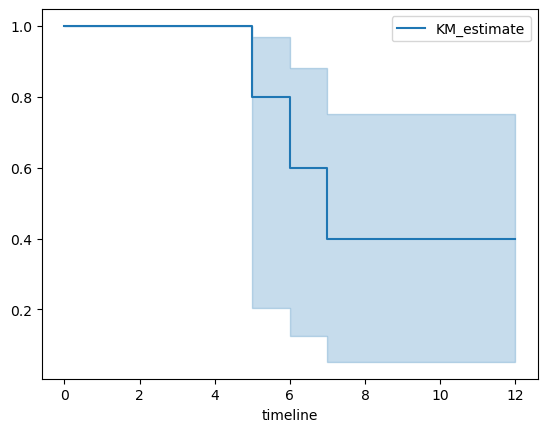

In [7]:
#Survival Analysis
import lifelines
from lifelines import KaplanMeierFitter
import pandas as pd

# Sample data
data = {
    'Customer_ID': [1, 2, 3, 4, 5],
    'Tenure': [5, 10, 7, 12, 6],  # in months
    'Churned': [1, 0, 1, 0, 1]  # 1 if churned, 0 otherwise
}
df = pd.DataFrame(data)

# Kaplan-Meier estimate
kmf = KaplanMeierFitter()
kmf.fit(durations=df['Tenure'], event_observed=df['Churned'])

# Plotting the survival function
kmf.plot_survival_function()

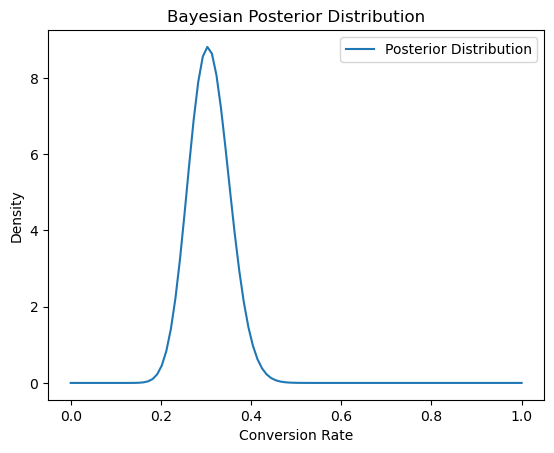

In [3]:
#Using Bayesian Statistics to calculate conversion rate
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt

# Prior beliefs
alpha_prior = 2
beta_prior = 2

# Data from the A/B test
conversions = 30
trials = 100

# Posterior distribution
alpha_post = alpha_prior + conversions
beta_post = beta_prior + trials - conversions

# Plotting the posterior distribution
x = np.linspace(0, 1, 100)
posterior = beta.pdf(x, alpha_post, beta_post)

plt.plot(x, posterior, label='Posterior Distribution')
plt.xlabel('Conversion Rate')
plt.ylabel('Density')
plt.title('Bayesian Posterior Distribution')
plt.legend()
plt.show()